<a href="https://colab.research.google.com/github/Colsai/Small-Assignments/blob/main/ny_hate_crime_short_prj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#New York Hate Crimes
## Basic Exploration of Anti-Asian Hate Crimes in New York City 
### 2018-2021

Change data into usable format here...

In [32]:
#Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [33]:
#Data
df = pd.read_csv("https://data.ny.gov/api/views/6xda-q7ev/rows.csv?accessType=DOWNLOAD")

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 605 entries, 0 to 604
Data columns (total 44 columns):
 #   Column                                        Non-Null Count  Dtype 
---  ------                                        --------------  ----- 
 0   County                                        605 non-null    object
 1   Year                                          605 non-null    int64 
 2   Crime Type                                    605 non-null    object
 3   Anti-Male                                     605 non-null    int64 
 4   Anti-Female                                   605 non-null    int64 
 5   Anti-Transgender                              605 non-null    int64 
 6   Anti-Gender Identity Expression               605 non-null    int64 
 7   Anti-Age*                                     605 non-null    int64 
 8   Anti-White                                    605 non-null    int64 
 9   Anti-Black                                    605 non-null    int64 
 10  An

In [35]:
df.columns

Index(['County', 'Year', 'Crime Type', 'Anti-Male', 'Anti-Female',
       'Anti-Transgender', 'Anti-Gender Identity Expression', 'Anti-Age*',
       'Anti-White', 'Anti-Black', 'Anti-American Indian/Alaskan Native',
       'Anti-Asian', 'Anti-Native Hawaiian/Pacific Islander',
       'Anti-Multi-Racial Groups', 'Anti-Other Race', 'Anti-Jewish',
       'Anti-Catholic', 'Anti-Protestant', 'Anti-Islamic (Muslim)',
       'Anti-Multi-Religious Groups', 'Anti-Atheism/Agnosticism',
       'Anti-Religious Practice Generally', 'Anti-Other Religion',
       'Anti-Buddhist', 'Anti-Eastern Orthodox (Greek, Russian, etc.)',
       'Anti-Hindu', 'Anti-Jehovahs Witness', 'Anti-Mormon',
       'Anti-Other Christian', 'Anti-Sikh', 'Anti-Hispanic', 'Anti-Arab',
       'Anti-Other Ethnicity/National Origin', 'Anti-Non-Hispanic*',
       'Anti-Gay Male', 'Anti-Gay Female', 'Anti-Gay (Male and Female)',
       'Anti-Heterosexual', 'Anti-Bisexual', 'Anti-Physical Disability',
       'Anti-Mental Disability

In [36]:
df.head()

,County,Year,Crime Type,Anti-Male,Anti-Female,Anti-Transgender,Anti-Gender Identity Expression,Anti-Age*,Anti-White,Anti-Black,Anti-American Indian/Alaskan Native,Anti-Asian,Anti-Native Hawaiian/Pacific Islander,Anti-Multi-Racial Groups,Anti-Other Race,Anti-Jewish,Anti-Catholic,Anti-Protestant,Anti-Islamic (Muslim),Anti-Multi-Religious Groups,Anti-Atheism/Agnosticism,Anti-Religious Practice Generally,Anti-Other Religion,Anti-Buddhist,"Anti-Eastern Orthodox (Greek, Russian, etc.)",Anti-Hindu,Anti-Jehovahs Witness,Anti-Mormon,Anti-Other Christian,Anti-Sikh,Anti-Hispanic,Anti-Arab,Anti-Other Ethnicity/National Origin,Anti-Non-Hispanic*,Anti-Gay Male,Anti-Gay Female,Anti-Gay (Male and Female),Anti-Heterosexual,Anti-Bisexual,Anti-Physical Disability,Anti-Mental Disability,Total Incidents,Total Victims,Total Offenders
0,Albany,2010,Crimes Against Persons,0,0,0,0,0,0,9,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2,1,0,0,0,0,0,13,13,20
1,Albany,2010,Property Crimes,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,2
2,Albany,2011,Crimes Against Persons,0,0,0,0,0,0,4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,7,7,7
3,Albany,2011,Property Crimes,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,3,3
4,Albany,2012,Crimes Against Persons,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,5,5,8


In [37]:
#Describe the dataset
df.groupby("Year").agg("sum").describe()

,Anti-Male,Anti-Female,Anti-Transgender,Anti-Gender Identity Expression,Anti-Age*,Anti-White,Anti-Black,Anti-American Indian/Alaskan Native,Anti-Asian,Anti-Native Hawaiian/Pacific Islander,Anti-Multi-Racial Groups,Anti-Other Race,Anti-Jewish,Anti-Catholic,Anti-Protestant,Anti-Islamic (Muslim),Anti-Multi-Religious Groups,Anti-Atheism/Agnosticism,Anti-Religious Practice Generally,Anti-Other Religion,Anti-Buddhist,"Anti-Eastern Orthodox (Greek, Russian, etc.)",Anti-Hindu,Anti-Jehovahs Witness,Anti-Mormon,Anti-Other Christian,Anti-Sikh,Anti-Hispanic,Anti-Arab,Anti-Other Ethnicity/National Origin,Anti-Non-Hispanic*,Anti-Gay Male,Anti-Gay Female,Anti-Gay (Male and Female),Anti-Heterosexual,Anti-Bisexual,Anti-Physical Disability,Anti-Mental Disability,Total Incidents,Total Victims,Total Offenders
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.0,10.000000,10.0,10.000000,10.000000,10.000000,10.000000,10.000000,10.0,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.00000,10.0,10.000000,10.00000,10.000000,10.0,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.300000,0.800000,2.800000,6.000000,2.300000,22.300000,102.500000,0.400000,9.900000,0.0,4.800000,0.0,250.800000,13.600000,1.000000,25.900000,4.100000,0.0,0.500000,4.900000,0.200000,0.100000,0.300000,0.100000,0.100000,1.90000,0.0,20.000000,5.80000,16.000000,0.0,80.100000,12.100000,6.400000,0.100000,0.200000,0.800000,0.400000,597.500000,617.400000,682.000000
std,0.483046,1.549193,1.932184,7.586538,3.465705,8.300602,23.735814,0.699206,4.771443,0.0,3.645393,0.0,47.990277,6.535374,1.247219,7.752419,5.087021,0.0,0.971825,4.863698,0.632456,0.316228,0.674949,0.316228,0.316228,2.18327,0.0,14.102797,6.05163,5.557777,0.0,20.393082,4.840799,3.596294,0.316228,0.421637,0.632456,0.699206,74.040905,79.156947,104.879825
min,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,75.000000,0.000000,4.000000,0.0,2.000000,0.0,199.000000,6.000000,0.000000,16.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,9.000000,0.00000,10.000000,0.0,54.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,503.000000,522.000000,546.000000
25%,0.000000,0.000000,1.250000,0.000000,0.000000,15.250000,87.500000,0.000000,5.750000,0.0,3.000000,0.0,223.750000,8.000000,0.000000,19.750000,2.000000,0.0,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,13.000000,2.25000,13.000000,0.0,61.000000,7.250000,3.750000,0.000000,0.000000,0.250000,0.000000,556.500000,573.250000,628.250000
50%,0.000000,0.000000,3.500000,1.000000,1.000000,22.000000,96.500000,0.000000,10.500000,0.0,3.000000,0.0,241.000000,12.000000,1.000000,25.000000,3.000000,0.0,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,0.0,15.000000,4.50000,14.000000,0.0,84.500000,14.000000,8.000000,0.000000,0.000000,1.000000,0.000000,579.500000,595.500000,657.000000
75%,0.750000,1.000000,4.000000,13.000000,2.750000,26.500000,117.000000,0.750000,11.750000,0.0,6.750000,0.0,249.500000,19.500000,1.000000,30.500000,3.750000,0.0,0.750000,5.750000,0.000000,0.000000,0.000000,0.000000,0.000000,3.75000,0.0,19.750000,6.75000,17.000000,0.0,92.750000,15.750000,8.000000,0.000000,0.000000,1.000000,0.750000,618.500000,653.500000,726.250000
max,1.000000,5.000000,5.000000,18.000000,11.000000,37.000000,140.000000,2.000000,20.000000,0.0,13.000000,0.0,341.000000,24.000000,4.000000,41.000000,18.000000,0.0,3.000000,14.000000,2.000000,1.000000,2.000000,1.000000,1.000000,5.00000,0.0,58.000000,21.00000,30.000000,0.0,114.000000,18.000000,11.000000,1.000000,1.000000,2.000000,2.000000,734.000000,771.000000,857.000000


In [38]:
df_asian_hc = df[['Year',
                  'Anti-Asian', 
                  'Anti-White', 
                  'Anti-Black',
                  'Anti-Hispanic',
                  'Total Incidents',]]

In [53]:
groups = ['Anti-Asian', 
          'Anti-White', 
          'Anti-Black',
          'Anti-Hispanic',]

In [39]:
#Here Let's melt the df
df_asian_hc.melt(id_vars = 'Year',
                 value_vars=[
                             'Anti-Asian', 
                             'Anti-White', 
                             'Anti-Black',
                             'Anti-Hispanic',
                             ]
                 )

,Year,variable,value
0,2010,Anti-Asian,0
1,2010,Anti-Asian,0
2,2011,Anti-Asian,0
3,2011,Anti-Asian,0
4,2012,Anti-Asian,1
...,...,...,...
2415,2017,Anti-Hispanic,0
2416,2018,Anti-Hispanic,0
2417,2018,Anti-Hispanic,0
2418,2019,Anti-Hispanic,0


In [ ]:
df_agg_asian = df_asian_hc.groupby("Year", 
                                   as_index = False).agg("sum")

In [44]:
def total_percent(df, srs_1, srs_total):
    return round(100*(df[srs_1]/df[srs_total]),4)

In [49]:
df_agg_asian['Total Percent Asian'] = total_percent(df_agg_asian, 'Anti-Asian', 'Total Incidents')
df_agg_asian['Total Percent Black'] = total_percent(df_agg_asian, 'Anti-Black', 'Total Incidents')
df_agg_asian['Total Percent White'] = total_percent(df_agg_asian, 'Anti-White', 'Total Incidents')
df_agg_asian['Total Percent Hispanic'] = total_percent(df_agg_asian, 'Anti-Hispanic', 'Total Incidents')

In [51]:
df_agg_asian = df_agg_asian.drop(columns = 'Total Percent')

In [52]:
df_agg_asian

,Year,Anti-Asian,Anti-White,Anti-Black,Anti-Hispanic,Total Incidents,Total Percent Asian,Total Percent Black,Total Percent White,Total Percent Hispanic
0,2010,20,32,140,58,703,2.8450,19.9147,4.5519,8.2504
1,2011,5,12,120,14,556,0.8993,21.5827,2.1583,2.5180
2,2012,12,20,138,25,734,1.6349,18.8011,2.7248,3.4060
3,2013,10,27,108,20,617,1.6207,17.5041,4.3760,3.2415
4,2014,4,14,89,13,558,0.7168,15.9498,2.5090,2.3297
5,2015,13,13,75,19,503,2.5845,14.9105,2.5845,3.7773
6,2016,11,24,75,9,599,1.8364,12.5209,4.0067,1.5025
7,2017,11,19,102,13,560,1.9643,18.2143,3.3929,2.3214
8,2018,8,25,91,13,526,1.5209,17.3004,4.7529,2.4715
9,2019,5,37,87,16,619,0.8078,14.0549,5.9774,2.5848


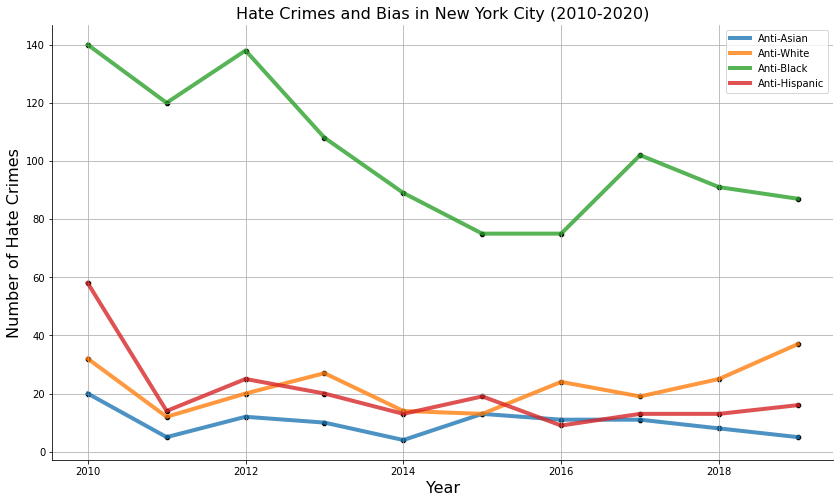

In [92]:
#Small plot of the two
fig, ax = plt.subplots(1, figsize = (14,8), sharex = True, sharey = True)

for i in range(0,len(groups)):
    sns.lineplot(x = 'Year',
                 y = groups[i], 
                 data = df_agg_asian, 
                 label = groups[i],
                 alpha = .8,
                 linewidth = 4,
                 )
    
    sns.scatterplot(x = 'Year',
                    y = groups[i], 
                    data = df_agg_asian, 
                    color = 'black',
                     )

ax.set_title("Hate Crimes and Bias in New York City (2010-2020)", size = 16)
ax.set_xlabel("Year", size = 16)
ax.set_ylabel("Number of Hate Crimes", size = 16)
ax.grid()

sns.despine()
ax.legend()

44.6w, 
25.1b,
27.5h,
11.8a

- Per population, hispanic, white, and asian hate crimes appear to be lower than what would be expected, whereas black hate crimes are far higher

Text(0, 0.5, 'Percentage of Anti-Asian Hate Crimes')

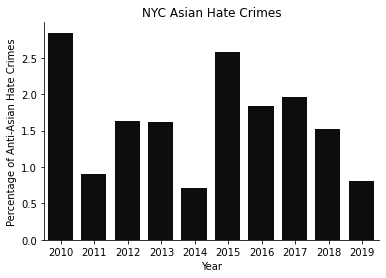

In [43]:
#Small plot of the two
sns.figsize = (16,12)

sns.barplot(x = 'Year',
            y = 'Total Percent',
            data = df_agg_asian,
            alpha = .95,
            color = 'black',
            Width = .75)

sns.despine()

#Labels
plt.title("NYC Asian Hate Crimes")
plt.xlabel("Year")
plt.ylabel("Percentage of Anti-Asian Hate Crimes")

*Note:* Despite a population of around 11.8% of Asian people in New York City, the percentage of total hate crimes in New York was very low.


It appears as if hate crimes against Asians had been on the decline (at least in terms of reported cases)